In [31]:
#META 04/27/2018
#my work through 'Text Analysis with Topic Models for the Humanities and Social Sciences'
#https://de.dariah.eu/tatom/index.html

#history
#04/27/2018 - downloaded code from Github and started walking step-by-step

## 1. Working with text
=================

This is a shortened version of the tutorial "Working with text" in the form of an interactive IPython notebook. This document is "live"; any code example can be edited and executed in the browser. To see this in action, change some part of the code in the *cell* below and then click on the play button above.

In [32]:
list_of_strings = ['working', 'with', 'text']
for s in list_of_strings:
    print(s)

working
with
text


### 1a. Creating a document-term matrix
-------------------------------

Word frequencies and document-term matrices are typical units of
analysis when working with text collections. It may come as a surprise
that reducing a book to a list of word frequencies retains useful
information, but practice has shown this to be the case. Treating texts
as a list of word frequencies (a vector) also makes available a range of
mathematical tools developed for [studying and manipulating
vectors](http://en.wikipedia.org/wiki/Euclidean_vector#History).

> **Note**: Turning texts into unordered lists (or "bags") of words is easy in
> Python. [Python Programming for the
> Humanities](http://fbkarsdorp.github.io/python-course/) includes a
> chapter entitled [Text
> Processing](http://nbviewer.ipython.org/urls/raw.github.com/fbkarsdorp/python-course/master/Chapter%203%20-%20Text%20Preprocessing.ipynb)
> that describes the steps in detail.

This document assumes some prior exposure to text analysis so we will
gather word frequencies (or term frequencies) derived from the lists of
words appearing in texts into a document-term matrix using the
[CountVectorizer](http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
class from the [scikit-learn](http://scikit-learn.sourceforge.net/)
package. (For those familiar with R and the
[tm](http://cran.r-project.org/web/packages/tm/) package, this function
performs the same operation as `DocumentTermMatrix` and takes
recognizably similar arguments.)

First we need to import the functions and classes we intend to use,
along with our customary abbreviation for functions in the `numpy`
package.

In [33]:
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

Now we use the
[CountVectorizer](http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
class to create a document-term matrix. `CountVectorizer` is highly
customizable. For example, a list of "stop words" can be specified with
the ``stop_words`` parameter. Other important parameters include:

-   `lowercase` (default `True`) convert all text to lowercase before
    tokenizing
-   `min_df` (default `1`) remove from the vocabulary terms that occur
    in fewer than `min_df` documents–with a large corpus this may be set
    to `5` to eliminate rare words
-   `vocabulary` ignore words that do not appear in the list (or
    iterable) assigned to parameter `vocabulary`
-   `strip_accents` remove accents
-   `token_pattern` (default `u'(?u)\b\w\w+\b'`) regular expression
    identifying tokens–by default words that consist of a single
    character (e.g., 'a', '2') are ignored, setting `token_pattern` to
    `'(?u)\b\w+\b'` will include these tokens
-   `tokenizer` (default unused) use a custom function for tokenizing

For this example we will use texts by Jane Austen and Charlotte Brontë. These
texts are available in the *Datasets* section of the collected tutorials.


In [34]:
filenames = ['data/austen-bronte/Austen_Emma.txt',           
             'data/austen-bronte/Austen_Pride.txt',          
             'data/austen-bronte/Austen_Sense.txt',          
             'data/austen-bronte/CBronte_Jane.txt',          
             'data/austen-bronte/CBronte_Professor.txt',     
             'data/austen-bronte/CBronte_Villette.txt']      
                                                             
vectorizer = CountVectorizer(input='filename')               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab_list = vectorizer.get_feature_names()

In [35]:
#$acmy preview dtm
dtm.shape

(6, 22854)

Now we have a document-term matrix and a vocabulary list. Before we can
query the matrix and find out, for example, how many times the word
'house' occurs in *Emma* (the first text in `filenames`), we need to
convert this matrix from its current format, a [sparse
matrix](http://docs.scipy.org/doc/scipy/reference/sparse.html), into a
normal NumPy array. We will also convert `vocab`, a list of vocabulary,
to an array of strings, as an array supports a greater variety of
operations.


In [36]:
# for reference, note the current class of `dtm`  
type(dtm)                                         
dtm = dtm.toarray()  # convert to a regular array 
vocab = np.array(vocab_list)

> **Note:** A sparse matrix is used to store matrices that contain a significant
> number of entries that are zero. Typically, a sparse matrix only
> records non-zero entries. To understand why this matters so much
> that `CountVectorizer` returns a sparse matrix by default,
> consider a 4000 by 50000 matrix that is 60% zeros. In Python an
> integer takes up 4 bytes, so using a sparse matrix saves almost
> 500M, which is a significant amount of computer memory. (Remember
> that arrays are usually stored in memory, not on disk).

Querying the document-term matrix and the vocabulary is straightforward.
For example, here are two ways of finding how many times the word
'house' occurs in the first text, *Emma*:


In [37]:
# the first file, indexed by 0 in Python, is *Emma*                 
filenames[0] == 'data/austen-brontë/Austen_Emma.txt'                
                                                                    
# use the standard Python list method index(...)                    
house_idx = vocab_list.index('house')                               
dtm[0, house_idx]                                                   
                                                                    
# alternatively, use NumPy indexing                                 
# in R this would be essentially the same, dtm[1, vocab == 'house'] 
dtm[0, vocab == 'house']                                         


array([95], dtype=int64)

In [38]:
# verify that this is the result we anticipated
vocab[house_idx]

'house'

#### Sandbox
=======
Feel free to experiment with the document-term matrix `dtm` in the code cells below.

In [39]:
print(dtm.shape)
for fn in filenames:
    print(fn)

(6, 22854)
data/austen-bronte/Austen_Emma.txt
data/austen-bronte/Austen_Pride.txt
data/austen-bronte/Austen_Sense.txt
data/austen-bronte/CBronte_Jane.txt
data/austen-bronte/CBronte_Professor.txt
data/austen-bronte/CBronte_Villette.txt


In [40]:
print(len(vocab))
vocab[500:550]  # look at some of the vocabulary

22854


array(['abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abyss',
       'acacia', 'acacias', 'academician', 'academicians', 'accede',
       'acceded', 'acceding', 'accelerate', 'accelerated', 'accent',
       'accented', 'accents', 'accentuated', 'accept', 'acceptable',
       'acceptably', 'acceptance', 'accepted', 'accepting', 'accepts',
       'access', 'accessible', 'accession', 'accessory', 'accident',
       'accidental', 'accidentally', 'accidently', 'accidents',
       'accommodate', 'accommodated', 'accommodating', 'accommodation',
       'accommodations', 'accompanied', 'accompanies', 'accompaniment',
       'accompaniments', 'accompany', 'accompanying', 'accompli',
       'accomplices', 'accomplish', 'accomplished'],
      dtype='<U20')

### 1b. Comparing texts
-------------------------------

Arranging our texts in a document-term matrix make available a range of exploratory procedures. For example, calculating a measure of similarity between texts becomes simple. Since each row of the document-term matrix is a sequence of a novel's word frequencies, it is possible to put mathematical notions of similarity (or distance) between sequences of numbers in service of calculating the similarity (or distnace) between any two novels. One frequently used measure of distance between vectors (a measure easily converted into a measure of similarity) is Euclidean distance. The Euclidean distance between two vectors in the plane should be familiar from geometry, as it is the length of the hypotenuse that joins the two vectors. For instance, consider the Euclidean distance between the vectors \vec{x} = (1, 3) and \vec{y} = (4, 2). The distance between the two vectors is \sqrt{(1-4)^2 + (3-2)^2} = \sqrt{10}.

Note

Measures of distance can be converted into measures of similarity. If your measures of distance are all between zero and one, then a measure of similarity could be one minus the distance. (The inverse of the distance would also serve as a measure of similarity.)

$actodo insert image


Note

More generally, given two vectors \vec{x} and \vec{y} in p-dimensional space, the Euclidean distance between the two vectors is given by

||\vec{x} - \vec{y}|| = \sqrt{\sum_{i=1}^p (x_i - y_i)^2}

This concept of distance is not restricted to two dimensions. For example, it is not difficult to imagine the figure above translated into three dimensions. We can also persuade ourselves that the measure of distance extends to an arbitrary number of dimensions; for any two matched components in a pair of vectors (such as x_2 and y_2), differences increase the distance.

Since two novels in our corpus now have an expression as vectors, we can calculate the Euclidean distance between them. We can do this by hand or we can avail ourselves of the scikit-learn function euclidean_distances.

In [41]:
# "by hand"
n, _ = dtm.shape
dist = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        x, y = dtm[i, :], dtm[j, :]
        dist[i, j] = np.sqrt(np.sum((x - y)**2))

from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)

np.round(dist, 1)
# *Pride and Prejudice* is index 1 and *Jane Eyre* is index 3
filenames[1] == 'data/austen-bronte/Austen_Pride.txt'
filenames[3] == 'data/austen-bronte/CBronte_Jane.txt'

# the distance between *Pride and Prejudice* and *Jane Eyre*
dist[1, 3]

# which is greater than the distance between *Jane Eyre* and *Villette* (index 5)
dist[1, 3] > dist[3, 5]


True

In [42]:
#preview dist
dist

array([[    0.        ,  3856.28875993,  4182.80109496,  5119.70301873,
         7113.27378919,  5280.17244037],
       [ 3856.28875993,     0.        ,  1922.60500363,  6313.08339878,
         4126.23932898,  6381.23875121],
       [ 4182.80109496,  1922.60500363,     0.        ,  6657.36419313,
         4045.34460831,  6650.31202276],
       [ 5119.70301873,  6313.08339878,  6657.36419313,     0.        ,
         8363.82765246,  2591.54664245],
       [ 7113.27378919,  4126.23932898,  4045.34460831,  8363.82765246,
            0.        ,  8484.05557502],
       [ 5280.17244037,  6381.23875121,  6650.31202276,  2591.54664245,
         8484.05557502,     0.        ]])

In [43]:
"""import os
OUTPUT_HTML_PATH = os.path.join('source', 'generated')
OUTPUT_FILENAME = 'getting_started_cosine.txt'
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]
"""
ARR, ROWNAMES, COLNAMES = dist, names, names

#display inline
df = pd.DataFrame(np.round(ARR, 2), index=ROWNAMES, columns=COLNAMES)
df

,Austen_Emma,Austen_Pride,Austen_Sense,CBronte_Jane,CBronte_Professor,CBronte_Villette
Austen_Emma,0.00,3856.29,4182.80,5119.70,7113.27,5280.17
Austen_Pride,3856.29,0.00,1922.61,6313.08,4126.24,6381.24
Austen_Sense,4182.80,1922.61,0.00,6657.36,4045.34,6650.31
CBronte_Jane,5119.70,6313.08,6657.36,0.00,8363.83,2591.55
CBronte_Professor,7113.27,4126.24,4045.34,8363.83,0.00,8484.06
CBronte_Villette,5280.17,6381.24,6650.31,2591.55,8484.06,0.00


And if we want to use a measure of distance that takes into consideration the length of the novels (an excellent idea), we can calculate the cosine similarity by importing sklearn.metrics.pairwise.cosine_similarity and use it in place of euclidean_distances.

Keep in mind that cosine similarity is a measure of similarity (rather than distance) that ranges between 0 and 1 (as it is the cosine of the angle between the two vectors). In order to get a measure of distance (or dissimilarity), we need to "flip" the measure so that a larger angle receives a larger value. The distance measure derived from cosine similarity is therefore one minus the cosine similarity between two vectors.

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
    
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

# the distance between *Pride and Prejudice* (index 1)
# and *Jane Eyre* (index 3) is
dist[1, 3]

# which is greater than the distance between *Jane Eyre* and
# *Villette* (index 5)
dist[1, 3] > dist[3, 5]

True

In [21]:
#preview dist
dist

array([[ -2.22044605e-16,   1.97991646e-02,   2.54477700e-02,
          5.33033683e-02,   5.85056420e-02,   5.47577694e-02],
       [  1.97991646e-02,  -4.44089210e-16,   1.65970214e-02,
          4.70262343e-02,   4.31295508e-02,   4.32719403e-02],
       [  2.54477700e-02,   1.65970214e-02,  -2.22044605e-16,
          5.60580626e-02,   4.68418996e-02,   4.90020814e-02],
       [  5.33033683e-02,   4.70262343e-02,   5.60580626e-02,
          0.00000000e+00,   1.59794084e-02,   1.36726702e-02],
       [  5.85056420e-02,   4.31295508e-02,   4.68418996e-02,
          1.59794084e-02,  -6.66133815e-16,   1.09404259e-02],
       [  5.47577694e-02,   4.32719403e-02,   4.90020814e-02,
          1.36726702e-02,   1.09404259e-02,   4.44089210e-16]])

Those interested in doing the calculation for themselves can use the following steps:

In [22]:
norms = np.sqrt(np.sum(dtm * dtm, axis=1, keepdims=True))  # multiplication between arrays is element-wise
    
dtm_normed = dtm / norms
similarities = np.dot(dtm_normed, dtm_normed.T)
np.round(similarities, 2)
# similarities between *Pride and Prejudice* and *Jane Eyre* is
similarities[1, 3]

0.95297376567683456

In [23]:
import os
import pandas as pd
OUTPUT_HTML_PATH = os.path.join('source', 'generated')
OUTPUT_FILENAME = 'getting_started_cosine.txt'
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]
ARR, ROWNAMES, COLNAMES = dist, names, names

html = pd.DataFrame(np.round(ARR, 2), index=ROWNAMES, columns=COLNAMES).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, OUTPUT_FILENAME), 'w') as f:
    f.write(html)

In [44]:
#display inline
df = pd.DataFrame(np.round(ARR, 2), index=ROWNAMES, columns=COLNAMES)
df

,Austen_Emma,Austen_Pride,Austen_Sense,CBronte_Jane,CBronte_Professor,CBronte_Villette
Austen_Emma,0.00,3856.29,4182.80,5119.70,7113.27,5280.17
Austen_Pride,3856.29,0.00,1922.61,6313.08,4126.24,6381.24
Austen_Sense,4182.80,1922.61,0.00,6657.36,4045.34,6650.31
CBronte_Jane,5119.70,6313.08,6657.36,0.00,8363.83,2591.55
CBronte_Professor,7113.27,4126.24,4045.34,8363.83,0.00,8484.06
CBronte_Villette,5280.17,6381.24,6650.31,2591.55,8484.06,0.00


### 1c. Visualizing distances
-------------------------------

It is often desirable to visualize the pairwise distances between our texts. A general approach to visualizing distances is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, "multidimensional scaling" (MDS) and family of functions in scikit-learn (and R too, see mdscale).

In [45]:
import os  # for os.path.basename
    
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

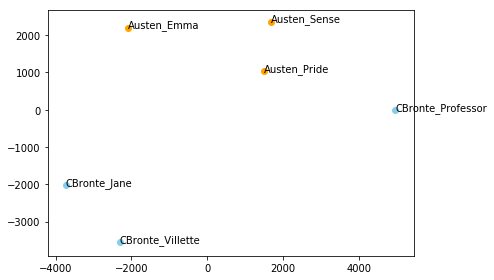

In [46]:
xs, ys = pos[:, 0], pos[:, 1]
# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]
# color-blind-friendly palette
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.tight_layout()

plt.savefig('plots/plot_getting_started_cosine_mds.png', bbox_inches='tight')
plt.show()

We can also do MDS in three dimensions:

In [47]:
# après Jeremy M. Stober, Tim Vieira
# https://github.com/timvieira/viz/blob/master/mds.py

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)


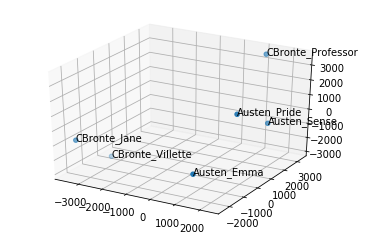

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

plt.savefig('plots/plot_getting_started_cosine_mds_3d.png', bbox_inches='tight')
plt.show()

### 1d. Clustering texts based on distance
--------------------------------------------------

Clustering texts into discrete groups of similar texts is often a useful exploratory step. For example, a researcher may be wondering if certain textual features partition a collection of texts by author or by genre. Pairwise distances alone do not produce any kind of classification. To put a set of distance measurements to work in classification requires additional assumptions, such as a definition of a group or cluster.

The ideas underlying the transition from distances to clusters are, for the most part, common sense. Any clustering of texts should result in texts that are closer to each other (in the distance matrix) residing in the same cluster. There are many ways of satisfying this requirement; there no unique clustering based on distances that is the "best". One strategy for clustering in circulation is called Ward's method. Rather than producing a single clustering, Ward's method produces a hierarchy of clusterings, as we will see in a moment. All that Ward's method requires is a set of pairwise distance measurements–such as those we calculated a moment ago. Ward's method produces a hierarchical clustering of texts via the following procedure:

Start with each text in its own cluster
Until only a single cluster remains,
Find the closest clusters and merge them. The distance between two clusters is the change in the sum of squared distances when they are merged.
Return a tree containing a record of cluster-merges.
The function scipy.cluster.hierarchy.ward performs this algorithm and returns a tree of cluster-merges. The hierarchy of clusters can be visualized using scipy.cluster.hierarchy.dendrogram.

C:\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


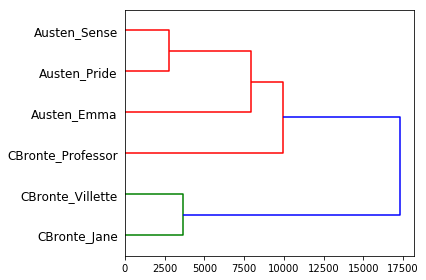

In [49]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

# match dendrogram to that returned by R's hclust()
dendrogram(linkage_matrix, orientation="right", labels=names)

plt.tight_layout()  # fixes margins

plt.savefig('plots/plot_getting_started_ward_dendrogram.png', bbox_inches='tight')
plt.show()

In [50]:
#$acskipped: exercises

#$acskipped: part2 Preprocessing: tokenizing, chunking, grouping, exercises

============================
## 3. Feature selection: finding distinctive words
==========================================================

We often want to know what words distinguish one group of texts from another group of texts. For instance, we might be working with an archive of two city newspapers, say, the Frankfurter Allgemeine Zeitung and the Frankfurter Rundschau and want to know which words tend to appear in one newspaper rather than the other. Or we might be interested in comparing word usage in US Presidents' State of the Union addresses given during recessions with addresses given during periods of economic growth. Or we might be comparing the style of several novelists and want to know if one author tends to use words not found in the works of others.

This section illustrates how distinctive words can be identified using a corpus of novels containing works by two authors: Jane Austen and Charlotte Brontë.

Austen, Emma
Austen, Pride and Prejudice
Austen, Sense and Sensibility
C. Brontë, Jane Eyre
C. Brontë, The Professor
C. Brontë, Villette
This :ref:`corpus of six novels <datasets>` consists of the following text files:

In [51]:
#indexing aka keywords
#index:: feature selection, distinctive words, Bayesian t-test, keyness, chi-squared test, Dunning log-likelihood, G-test
#authors: Austen, Jane; Brönte, Charlotte

In [52]:
N_WORDS_DISPLAY = 11
CORPUS_PATH = os.path.join('data', 'british-fiction-corpus')
OUTPUT_HTML_PATH = os.path.join('source', 'generated')
AUSTEN_FILENAMES = ['Austen_Emma.txt', 'Austen_Pride.txt', 'Austen_Sense.txt']
CBRONTE_FILENAMES = ['CBronte_Jane.txt', 'CBronte_Professor.txt', 'CBronte_Villette.txt']
filenames = AUSTEN_FILENAMES + CBRONTE_FILENAMES

We will find that among the words that reliably distinguish Austen from Brontë are "such", "could", and "any". This tutorial demonstrates how we arrived at these words.

Note

The following features an introduction to the concepts underlying feature selection. Those who are working with a very large corpus and are familiar with statistics may wish to skip ahead to the section on :ref:`group comparison <bayesian-group-comparison>` or the section :ref:`chi2`.

Since we are concerned with words, we begin by extracting word frequencies from each of the texts in our corpus and :ref:`construct a document-term matrix <working-with-text>` that records the rate per 1,000 words for each word appearing in the corpus. Using rates rather than counts will allow us to account for differences in the length of the novels. Accounting for differences in document lengths when dealing with word counts is essential. For example, a text using "whence" ten times in a 1,000 word article uses the word at a rate of 10 per 1,000 words, while a 100,000 word novel that uses "whence" 20 times uses it at a rate of 0.2 per 1,000 words. While the word occurs more in absolute terms in the second text, the rate is higher in the first text. While there are other ways to account for document length---a procedure called "normalization"---considering the rate per 1,000 words will serve us well. An appealing feature of word rates per 1,000 words is that readers are familiar with documents of this length (e.g., a newspaper article).

In [53]:
import os
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

filenames_with_path = [os.path.join(CORPUS_PATH, fn) for fn in filenames]
# these texts have underscores ('_') that indicate italics; remove them.
raw_texts = []
for fn in filenames_with_path:
    with open(fn) as f:
        text = f.read()
        text = text.replace('_', '')  # remove underscores (italics)
        raw_texts.append(text)

vectorizer = CountVectorizer(input='content')
dtm = vectorizer.fit_transform(raw_texts)
vocab = np.array(vectorizer.get_feature_names())
# fit_transform returns a sparse matrix (which uses less memory)
# but we want to work with a normal numpy array.
dtm = dtm.toarray()

# normalize counts to rates per 1000 words
rates = 1000 * dtm / np.sum(dtm, axis=1, keepdims=True)

In [54]:
# just examine a sample, those at offsets 100 to 105
rates[:, 100:105]
vocab[100:105]

array(['abdiel', 'abdy', 'abed', 'aberdeen', 'aberration'],
      dtype='<U20')

In [55]:
assert rates.shape == dtm.shape

filenames_short = [fn.rstrip('.txt') for fn in filenames]

html = pd.DataFrame(np.round(rates[:, 100:105], 2), index=filenames_short, columns=vocab[100:105]).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_rates.txt'), 'w') as f:
    f.write(html)

In [56]:
#display inline
df = pd.DataFrame(np.round(rates[:, 100:105], 2), index=filenames_short, columns=vocab[100:105])
df

,abdiel,abdy,abed,aberdeen,aberration
Austen_Emma,0.00,0.01,0.00,0.00,0.00
Austen_Pride,0.00,0.00,0.00,0.00,0.00
Austen_Sense,0.00,0.00,0.00,0.00,0.00
CBronte_Jane,0.00,0.00,0.00,0.00,0.00
CBronte_Professor,0.01,0.00,0.00,0.00,0.00
CBronte_Villette,0.00,0.00,0.01,0.01,0.01


### 3a. Measuring "distinctiveness"
--------------------------------------------------

Finding distinctive words requires a decision about what "distinctive" means. As we will see, there are a variety of definitions that we might use. It seems reasonable to expect that all definitions of distinctive would identify as distinctive words found exclusively in texts associated with a single author (or group). For example, if Brontë uses the word "access" and Austen never does, we should count "access" as distinctive. A more challenging question is how to treat words that occur in both groups of texts but do so with different rates.

Finding words that are unique to a group is a simple exercise. Indeed, it is worth treating these words a special case so they will not clutter our work later on. We will quickly identify these words and remove them. (They tend not to be terribly interesting words.)

A simple way of identifying words unique to one author would be to calculate the average rate of word use across all texts for each author and then to look for cases where the average rate is zero for one author.

In [57]:
# indices so we can refer to the rows for the relevant author
austen_indices, cbronte_indices = [], []
for index, fn in enumerate(filenames):
    if "Austen" in fn:
        austen_indices.append(index)
    elif "CBronte" in fn:
        cbronte_indices.append(index)

# this kind of slicing should be familiar if you've used R or Octave/Matlab
austen_rates = rates[austen_indices, :]
cbronte_rates = rates[cbronte_indices, :]

# np.mean(..., axis=0) calculates the column-wise mean
austen_rates_avg = np.mean(austen_rates, axis=0)
cbronte_rates_avg = np.mean(cbronte_rates, axis=0)

# since zero times any number is zero, this will identify documents where
# any author's average rate is zero
distinctive_indices = (austen_rates_avg * cbronte_rates_avg) == 0

# examine words that are unique, ranking by rates
np.count_nonzero(distinctive_indices)
ranking = np.argsort(austen_rates_avg[distinctive_indices] + cbronte_rates_avg[distinctive_indices])[::-1]  # from highest to lowest; [::-1] reverses order.
vocab[distinctive_indices][ranking]

array(['elinor', 'emma', 'marianne', ..., 'incautious', 'incedingly',
       'kitten'],
      dtype='<U20')

In [58]:
arr = np.vstack([austen_rates_avg[distinctive_indices][ranking][0:N_WORDS_DISPLAY],
                 cbronte_rates_avg[distinctive_indices][ranking][0:N_WORDS_DISPLAY]])
colnames = vocab[distinctive_indices][ranking][0:N_WORDS_DISPLAY]
rownames = ['Austen', 'Brontë']
html = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_distinctive.txt'), 'w') as f:
    f.write(html)

In [59]:
#display inline
df = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames)
df

,elinor,emma,marianne,darcy,weston,bennet,bingley,monsieur,knightley,elton,dashwood
Austen,1.97,1.86,1.63,1.18,0.95,0.91,0.86,0.00,0.84,0.83,0.72
Brontë,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.86,0.00,0.00,0.00


Now that we have identified these words, we will remove them from our corpus in order to focus on identifying distinctive words that appear in texts associated with every author.

In [60]:
dtm = dtm[:, np.invert(distinctive_indices)]
rates = rates[:, np.invert(distinctive_indices)]
vocab = vocab[np.invert(distinctive_indices)]

# recalculate variables that depend on rates
austen_rates = rates[austen_indices, :]
cbronte_rates = rates[cbronte_indices, :]
austen_rates_avg = np.mean(austen_rates, axis=0)
cbronte_rates_avg = np.mean(cbronte_rates, axis=0)


#### Differences in averages

How can we identify a distinctive word? One approach would compare the average rate at which authors use a word. A simple quantitative comparison would calculate the difference between the rates. If one author uses a word often across his or her oeuvre and another barely uses the word at all, then we suspect the difference in rates will be large. This will be the first definition of distinctiveness (sometimes called "keyness") we will consider. Using this measure we can calculate the top ten distinctive words in the Austen-Brontë comparison as follows:

In [61]:
# calculate absolute value because we only care about the magnitude of the difference
keyness = np.abs(austen_rates_avg - cbronte_rates_avg)
ranking = np.argsort(keyness)[::-1]  # from highest to lowest; [::-1] reverses order in Python sequences

# print the top 10 words along with their rates and the difference
vocab[ranking][0:10]

array(['the', 'to', 'her', 'my', 'me', 'be', 'and', 'she', 'mr', 'very'],
      dtype='<U20')

In [62]:
    arr = np.vstack([keyness[ranking][0:N_WORDS_DISPLAY],
                     austen_rates[:, ranking][:, 0:N_WORDS_DISPLAY],
                     cbronte_rates[:, ranking][:, 0:N_WORDS_DISPLAY]])
    colnames = vocab[ranking][0:N_WORDS_DISPLAY]
    rownames = ["--keyness--"] + filenames_short
    html = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames).to_html()
    with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_distinctive_avg_diff.txt'), 'w') as f:
        f.write(html)

In [63]:
#display inline
df = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames)
df

,the,to,her,my,me,be,and,she,mr,very,mrs
--keyness--,9.87,7.07,6.98,6.66,6.23,6.03,4.94,4.80,3.70,3.26,3.14
Austen_Emma,33.65,33.90,16.10,4.73,3.77,12.78,31.67,15.29,7.46,7.84,4.53
Austen_Pride,36.67,35.24,18.86,6.04,3.79,10.49,30.35,14.48,6.66,4.12,2.90
Austen_Sense,35.42,35.52,22.01,5.42,3.83,11.22,30.13,13.92,1.54,4.31,4.57
CBronte_Jane,44.44,29.64,9.71,12.65,11.63,5.82,37.53,8.37,3.08,2.14,1.42
CBronte_Professor,45.63,27.91,14.74,13.18,9.07,5.17,34.93,10.45,1.23,2.26,0.32
CBronte_Villette,45.29,25.91,11.59,10.33,9.39,5.39,34.50,10.46,0.25,2.11,0.84


This is a start. The problem with this measure is that it tends to highlight differences in very frequent words. For example, this method gives greater attention to a word that occurs 30 times per 1,000 words in Austen and 25 times per 1,000 in Brontë than it does to a word that occurs 5 times per 1,000 words in Austen and 0.1 times per 1,000 words in Brontë. This does not seem right. It seems important to recognize cases when one author uses a word frequently and another author barely uses it.

As this initial attempt suggests, identifying distinctive words will be a balancing act. When comparing two groups of texts differences in the rates of frequent words will tend to be large relative to differences in the rates of rarer words. Human language is variable; some words occur more frequently than others regardless of who is writing. We need to find a way of adjusting our definition of distinctive in light of this.

One adjustment that is easy to make is to divide the difference in authors' average rates by the average rate across all authors. Since dividing a quantity by a large number will make that quantity smaller, our new distinctiveness score will tend to be lower for words that occur frequently. While this is merely a heuristic, it does move us in the right direction.

In [64]:
# we have already calculated the following quantities
# austen_rates_avg
# cbronte_rates_avg

rates_avg = np.mean(rates, axis=0)

keyness = np.abs(austen_rates_avg - cbronte_rates_avg) / rates_avg
ranking = np.argsort(keyness)[::-1]  # from highest to lowest; [::-1] reverses order.

# print the top 10 words along with their rates and the difference
vocab[ranking][0:10]

array(['madame', 'elizabeth', 'graham', 'lizzy', 'flowers', 'french',
       'lessons', 'smallest', 'clean', 'movement'],
      dtype='<U20')

In [65]:
arr = np.vstack([keyness[ranking][0:N_WORDS_DISPLAY],
                 austen_rates[:, ranking][:, 0:N_WORDS_DISPLAY],
                 cbronte_rates[:, ranking][:, 0:N_WORDS_DISPLAY]])
colnames = vocab[ranking][0:N_WORDS_DISPLAY]
rownames = ["--keyness--"] + filenames_short
html = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_distinctive_avg_diff_divided_by_avg.txt'), 'w') as f:
    f.write(html)

In [66]:
#display inline
df = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames)
df

,madame,elizabeth,graham,lizzy,flowers,french,lessons,smallest,clean,movement,schoolroom
--keyness--,1.99,1.99,1.98,1.97,1.96,1.95,1.95,1.94,1.94,1.94,1.94
Austen_Emma,0.01,0.05,0.01,0.00,0.01,0.01,0.01,0.13,0.01,0.01,0.01
Austen_Pride,0.00,5.38,0.00,0.81,0.00,0.01,0.00,0.09,0.00,0.00,0.00
Austen_Sense,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00
CBronte_Jane,0.07,0.01,0.00,0.01,0.18,0.23,0.06,0.01,0.16,0.11,0.19
CBronte_Professor,0.56,0.00,0.00,0.00,0.21,0.71,0.31,0.00,0.14,0.19,0.14
CBronte_Villette,1.92,0.01,1.22,0.00,0.21,0.32,0.15,0.00,0.12,0.12,0.06


This method improves on our initial attempt. It has the virtue of being simple and easy to implement. Yet it has its flaws. For example, the method tends to overemphasize very rare words.

Just as there are many definitions of "similarity" or "distance" available to compare two texts (see :ref:`working-with-text`), there are many definitions of distinctive that can be used to identify words that characterize a group of texts.

Note

While we used the absolute value of the difference in average rates, |x-y| we might have easily used the squared difference, (x-y)^2 as it has similar properties (always positive, increasing as difference increases).

### 3b. Bayesian group comparison
--------------------------------------------------

Note

The following sections assume some familiarity with statistics and probability. Introductory texts include :cite:`casella_statistical_2001`, :cite:`hoff_first_2009`, and :cite:`lee_bayesian_2004`.

Note

The following excursion into the world of Bayesian inference and Gibbs sampling is closely related to topic modeling and Latent Dirichlet Allocation (LDA). The inference for the model discussed below proceeds using a Gibbs sampler from the full condition distribution of each variable of interest---precisely the same procedure is used in LDA.

A more nuanced comparison of word use in two groups takes account of the variability in word use. Consider for instance the word "green" in Austen and Brontë. In Austen the word occurs with the following rates: 0.01, 0.03, and 0.06 (0.03 on average). In Brontë the word is consistently more frequent: 0.16, 0.36, and 0.22 (0.24 on average). These two groups of rates look different. But consider how our judgment might change if the rates observed in Brontë's novels were much more variable, say, 0.03, 0.04, and 0.66 (0.24 on average). Although the averages remain the same, the difference does not seem so pronounced; with only one observation (0.66) noticeably greater than we find in Austen, we might reasonably doubt that there is evidence of a systematic difference between the authors. [1]

One way of formalizing a comparison of two groups that takes account of the variability of word usage comes from Bayesian statistics. To describe our beliefs about the word frequencies we observe, we use a probability distribution, which we will call our a sampling model. Under the model we will use, the rates are assumed to come from two different normal distributions. The question we will be asking is how confident we are that the means of the two normal distributions are different. How confident we are (expressed as a probability) that the means are indeed different will stand in as our measure of distinctiveness.

We will use the parameterization below for our two normal sampling distributions. Group 1 corresponds to Austen and group 2 corresponds to Brontë:

Y_{i,1} = \mu + \delta + \epsilon_{i,1}
Y_{i,2} = \mu - \delta + \epsilon_{i,2}
\{\epsilon_{i,j}\} \sim \textrm{i.i.d.} \; \textrm{Normal}(0, \sigma^2)
n = 1, 2, 3
(i.i.d. stands for independently and identically distributed)

It is easy to relate this parameterization back to two normal distributions. Austen's texts come from a normal distribution with mean parameter \theta_1 = \mu + \delta and variance \sigma^2, whereas Brontë's novels come from a distribution with the same variance and with mean parameter \theta_2 = \mu - \delta. \delta corresponds to half the difference between the two means and it is through this parameter that we will judge how confident we are of a difference between the two distributions.

As we consider the question of what prior distributions to assign to \mu, \delta, and \sigma^2 we need to keep in mind that the word rates must be positive even though we are using normal distributions (which will always assign some, potentially quite small, probability to negative values). A compromise that will allow us to make use of computationally-convenient conjugate prior distributions will be to use normal prior distributions that favor positive values in most cases. As we will be modeling more than ten thousand of vocabulary items, computational speed will be important. These are the prior distributions that we will use:

\mu \sim \textrm{Normal}(\mu_0, \tau_0^2)
\delta \sim \textrm{Normal}(0, \gamma_0^2)
\sigma^2 \sim \textrm{Inverse-Gamma}(\nu_0/2, \nu_0\sigma_0^2/2)

We need to determine suitable values for the priors' parameters (called hyperparameters): \mu_0, \tau_0^2, \gamma_0^2, \nu_0, and \sigma_0^2. Let us consider \mu_0 and \sigma_0^2 first. While words like "the" and "she" occur quite frequently, almost all words (>99%) occur less than four times per 1,000 words:

In [67]:
np.mean(rates < 4)

np.mean(rates > 1)

from scipy.stats.mstats import mquantiles  # analgous to R's quantiles
mquantiles(rates, prob=[0.01, 0.5, 0.99])


array([ 0.        ,  0.01189641,  1.63135755])

In keeping with this observation we will set \mu_0 to be 3 and \tau^2 to be 1.5^2, with the reasoning that when drawing from a normal distribution, the great majority (.95) of observations will fall between two standard deviations of the mean. There isn't tremendous variability in rates across the works of a single author, so we will set \sigma_0^2 to be 1 and \nu_0 to be 1. (If we were to use non-conjugate priors we could model our prior beliefs about rates more realistically.) We know there is considerable variability in the rates between authors, so we will choose \gamma_0^2 to be 1.5^2, as \delta represents half the difference between the means and its value is unlikely to be greater than 3 in absolute value.

With these conjugate priors it is possible to use a Gibbs sampler to sample efficiently from the posterior distribution, using the full conditional distributions for the parameters of interest :cite:`hoff_first_2009`:

\{\mu|\mathbf{y_1}, \mathbf{y_2}, \delta, \sigma^2\} &\sim \textrm{Normal}(\mu_n, \gamma_n^2)\\
    \mu_n &= \gamma_n^2 \times [\mu_0/\gamma_0^2 + \sum_{i=1}^{n_1} (y_{i,1} - \delta)/\sigma^2 +
        \sum_{i=1}^{n_2} (y_{i,2} - \delta)/\sigma^2 ] \\
    \gamma_n^2 &= [1/\gamma_0^2 + (n_1+n_2)/\sigma^2]^{-1} \\
\{\delta|\mathbf{y_1}, \mathbf{y_2}, \mu, \sigma^2\} &\sim \textrm{Normal}(\delta_n, \tau_n^2)\\
    \delta_n &= \tau_n^2 \times [ \delta_0/\tau_0^2 +
        \sum_{i=1}^{n_1} (y_{i,1} - \mu)/\sigma^2 - \sum_{i=1}^{n_2} (y_{i,2} - \mu)/\sigma^2 ]\\
    \tau_n^2 &= [1/\tau_0^2 + (n_1+n_2)/\sigma^2]^{-1} \\
\{\sigma^2|\mathbf{y_1}, \mathbf{y_2}, \delta, \mu\} &\sim \textrm{Inverse-Gamma}(\nu_n/2, \nu_n\sigma_n^2/2)\\
    \nu_n &= \nu_0 + n_1 + n_2 \\
    \nu_n\sigma_n^2 &= \nu_0\sigma_0^2 +
        \sum_{i=1}^{n_1} (y_{i,1} - (\mu+\delta)) + \sum_{i=1}^{n_2} (y_{i,2} - (\mu - \delta)) \\
In Python, we can wrap the Gibbs sampler in single function and use it to get a distribution of posterior values for \delta, which is the variable we care about in this context as it characterizes our belief about the difference in authors' word usage.

In [68]:
def sample_posterior(y1, y2, mu0, sigma20, nu0, delta0, gamma20, tau20, S):
    """Draw samples from posterior distribution using Gibbs sampling
    Parameters
    ----------
    `S` is the number of samples
    Returns
    -------
    chains : dict of array
        Dictionary has keys: 'mu', 'delta', and 'sigma2'.
    """
    n1, n2 = len(y1), len(y2)
    # initial values
    mu = (np.mean(y1) + np.mean(y2))/2
    delta = (np.mean(y1) - np.mean(y2))/2
    vars = ['mu', 'delta', 'sigma2']
    chains = {key: np.empty(S) for key in vars}
    for s in range(S):
        # update sigma2
        a = (nu0+n1+n2)/2
        b = (nu0*sigma20 + np.sum((y1-mu-delta)**2) + np.sum((y2-mu+delta)**2))/2
        sigma2 = 1 / np.random.gamma(a, 1/b)
        # update mu
        mu_var = 1/(1/gamma20 + (n1+n2)/sigma2)
        mu_mean = mu_var * (mu0/gamma20 + np.sum(y1-delta)/sigma2 +
                            np.sum(y2+delta)/sigma2)
        mu = np.random.normal(mu_mean, np.sqrt(mu_var))
        # update delta
        delta_var = 1/(1/tau20 + (n1+n2)/sigma2)
        delta_mean = delta_var * (delta0/tau20 + np.sum(y1-mu)/sigma2 -
                                np.sum(y2-mu)/sigma2)
        delta = np.random.normal(delta_mean, np.sqrt(delta_var))
        # save values
        chains['mu'][s] = mu
        chains['delta'][s] = delta
        chains['sigma2'][s] = sigma2
    return chains

In [69]:
 # data
word = "green"
y1, y2 = austen_rates[:, vocab == word], cbronte_rates[:, vocab == word]

# prior parameters
mu0 = 3
tau20 = 1.5**2

nu0 = 1
sigma20 = 1

delta0 = 0
gamma20 = 1.5**2

# number of samples
S = 2000

chains = sample_posterior(y1, y2, mu0, sigma20, nu0, delta0, gamma20, tau20, S)

delta = chains['delta']

These samples reflect what our belief about \delta ought to be given our prior specification. Our interest is in \delta, which represents the half the difference between the population means for the distributions characterizing word rates in Austen and Brontë. We aren't concerned with whether or not it is negative or positive, but we do care whether or not it is likely to be zero. In fact, we need to have a measure of how confident we are that \delta is something other than zero (implying no difference in means). If, for instance, the moment that samples of \delta tend to be negative; we need to know the posterior probability of its being definitively less than zero, \textrm{p}(\delta < 0). This probability can be estimated from the output of the Gibbs sampler. The following demonstrates the calculation of this probability for two different words, 'green' and 'dark', both words more characteristic of the Brontë novels than the Austen novels.

In [70]:
y1 = austen_rates[:, vocab == 'green']
y2 = cbronte_rates[:, vocab == 'green']
chains = sample_posterior(y1, y2, mu0, sigma20, nu0, delta0, gamma20, tau20, S)
delta_green = chains['delta']

y1 = austen_rates[:, vocab == 'dark']
y2 = cbronte_rates[:, vocab == 'dark']
chains = sample_posterior(y1, y2, mu0, sigma20, nu0, delta0, gamma20, tau20, S)
delta_dark = chains['delta']

# estimate of p(delta < 0)
np.mean(delta_dark < 0)

0.85399999999999998

In [71]:
words = ['dark', 'green']
ix = np.in1d(vocab, words)

all(vocab[ix] == words)  # order matters for subsequent display

keyness = np.asarray([np.mean(delta_dark < 0), np.mean(delta_green < 0)])


In [72]:
arr = [keyness, austen_rates_avg[ix], cbronte_rates_avg[ix]]
colnames = vocab[ix]
rownames = ['p(delta<0)', 'Austen average', 'Bronte average']
html = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_bayesian_dark_green.txt'), 'w') as f:
    f.write(html)

In [73]:
#display inline
df = pd.DataFrame(np.round(arr, 2), index=rownames, columns=colnames)
df

,dark,green
p(delta<0),0.85,0.69
Austen average,0.03,0.03
Bronte average,0.47,0.24


As 'dark' is more distinctive of Brontë than 'green' is, the probabilities (our measure of distinctiveness or keyness) reflect this.

If we want to apply this "feature selection" method en masse to every word occurring in the corpus, we need only write one short loop and make an adjustment for the fact that we don't care whether or not \delta is positive or negative:

In [74]:
# fewer samples to speed things up, this may take several minutes to run
S = 200

def delta_confidence(rates_one_word):
    austen_rates = rates_one_word[0:3]
    bronte_rates = rates_one_word[3:6]
    chains = sample_posterior(austen_rates, bronte_rates, mu0, sigma20, nu0,
                              delta0, gamma20, tau20, S)
    delta = chains['delta']
    return np.max([np.mean(delta < 0), np.mean(delta > 0)])

In [75]:
# because this computation takes so long, we will try to cache it
CACHE_PATH = os.path.join('source', 'cache')
KEYNESS_FILENAME = os.path.join(CACHE_PATH, 'feature_selection_keyness.npy')
os.path.exists(KEYNESS_FILENAME)
keyness = np.load(KEYNESS_FILENAME) if os.path.exists(KEYNESS_FILENAME) else np.apply_along_axis(delta_confidence, axis=0, arr=rates)
np.save(KEYNESS_FILENAME, keyness)
os.path.exists(KEYNESS_FILENAME)


True

In [76]:
# apply the function over all columns
keyness = np.apply_along_axis(delta_confidence, axis=0, arr=rates)

In [77]:
ranking = np.argsort(keyness)[::-1]  # from highest to lowest; [::-1] reverses order.

# print the top 10 words along with their rates and the difference
vocab[ranking][0:10]

array(['so', 'been', 'much', 'could', 'such', 'me', 'all', 'them',
       'herself', 'am'],
      dtype='<U20')

In [78]:
arr = np.vstack([keyness[ranking][0:N_WORDS_DISPLAY],
                 austen_rates[:, ranking][:, 0:N_WORDS_DISPLAY],
                 cbronte_rates[:, ranking][:, 0:N_WORDS_DISPLAY]])
colnames = vocab[ranking][0:N_WORDS_DISPLAY]
rownames = ["--keyness--"] + filenames_short
html = pd.DataFrame(np.round(arr, 1), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_bayesian.txt'), 'w') as f:
    f.write(html)

In [79]:
#display inline
df = pd.DataFrame(np.round(arr, 1), index=rownames, columns=colnames)
df

,so,been,much,could,such,me,all,them,herself,am,every
--keyness--,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Austen_Emma,6.3,4.9,3.1,5.4,3.2,3.8,5.5,2.8,1.8,2.7,2.8
Austen_Pride,5.0,4.4,2.8,4.5,3.3,3.8,5.3,3.7,1.9,2.7,1.7
Austen_Sense,5.6,3.8,2.5,5.0,3.1,3.8,5.7,4.0,2.2,2.4,3.3
CBronte_Jane,3.6,2.2,1.2,2.9,1.5,11.6,3.6,2.3,0.3,2.2,0.6
CBronte_Professor,3.9,2.2,1.3,2.3,1.4,9.1,3.0,1.9,0.5,1.2,0.6
CBronte_Villette,3.8,1.9,1.4,2.9,1.6,9.4,3.9,1.9,0.6,1.3,0.5


This produces a useful ordering of characteristic words. Unlikely frequentist methods discussed below (chi-squared and log likelihood) this approach considers the variability of observations within groups. This method will also work for small corpora provided useful prior information is available. To the extent that we are interested in a close reading of differences of vocabulary use, the Bayesian method should be preferred. [2]

### #c. Log likelihood ratio and :math:`\chi^2` feature selection
=========================================================

We can recast our discussions about measuring distinctiveness in terms of hypothesis testing. This turns out to be a satisfying way of thinking about the problem and it also allows us to introduce a range of feature selection methods, including the log likelihood test and the χ 2  
χ2
 test.

One hypothesis that we might test comes as no surprise: rather than two groups of texts characterized by different word rates, this hypothesis claims that there is, in fact, a single group. Words are examined one at a time; those words for which this hypothesis seems most wrong will be counted as distinctive (classical statistics is always a workout in counterfactual language).

Consider again the word “green”. Taking all the Austen texts together, the word “green” occurs 11 times out of ~370,000 words (0.03 per 1,000 words). In the novels by Brontë, “green” occurs 96 times out of ~400,000 (0.24 per 1,000 words). We do not really need statistics to tell us that this is a large difference: picking a word from each author-specific corpus at random, one is ten times more likely to find “green” in the Brontë corpus. To summarize the appearance of the word “green” we may assemble a table with the following code:


In [80]:
green_austen = np.sum(dtm[austen_indices, vocab == "green"])
nongreen_austen = np.sum(dtm[austen_indices, :]) - green_austen
green_cbronte = np.sum(dtm[cbronte_indices, vocab == "green"])
nongreen_cbronte = np.sum(dtm[cbronte_indices, :]) - green_cbronte

green_table = np.array([[green_austen, nongreen_austen],
                        [green_cbronte, nongreen_cbronte]])
green_table

array([[    11, 374596],
       [    96, 404720]], dtype=int64)

In [81]:
arr = green_table
colnames = ['"green"', 'not "green"']
rownames = ['Austen', 'C. Bronte']
html = pd.DataFrame(arr, index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_green_table.txt'), 'w') as f:
    f.write(html)

In [82]:
#display inline
df = pd.DataFrame(np.round(green_table, 1), index=rownames, columns=colnames)
df

,"""green""","not ""green"""
Austen,11,374596
C. Bronte,96,404720


The hypothesis being tested is that the grouping of the counts by author is unnecessary, that P(word="green"|author="Austen")=P(word="green"|author!="Austen") 
P(word="green"|author="Austen")=P(word="green"|author!="Austen")
. If this were the case, then the rate of “green” in the corpus is the same, namely 0.14 per 1,000 words, and we would anticipate seeing the following frequencies given the total number of words for each group of texts:

In [83]:
prob_green = np.sum(dtm[:, vocab == "green"]) / np.sum(dtm)
prob_notgreen = 1 - prob_green
labels = []
for fn in filenames:
    label = "Austen" if "Austen" in fn else "CBrontÃ«"
    labels.append(label)
n_austen = np.sum(dtm[labels == "Austen", :])
n_cbronte = np.sum(dtm[labels != "Austen", :])

expected_table = np.array([[prob_green * n_austen, prob_notgreen * n_austen],
                           [prob_green * n_cbronte, prob_notgreen * nongreen_cbronte]])
expected_table
print(expected_table)

# same result, but more concise and more general
from sklearn.preprocessing import LabelBinarizer
X = dtm[:, vocab == "green"]
X = np.append(X, np.sum(dtm[:, vocab != "green"], axis=1, keepdims=True), axis=1)
y = LabelBinarizer().fit_transform(labels)
y = np.append(1 - y, y, axis=1)
green_table = np.dot(y.T, X)
green_table

feature_count = np.sum(X, axis=0, keepdims=True)
class_prob = np.mean(y, axis=0, keepdims=True)
expected_table = np.dot(class_prob.T, feature_count)
expected_table

[[  0.00000000e+00   0.00000000e+00]
 [  1.07000000e+02   4.04664440e+05]]


array([[  5.35000000e+01,   3.89658000e+05],
       [  5.35000000e+01,   3.89658000e+05]])

In classical statistics, hypothesis tests typically have a quantity called
a test statistic associated with them. If the test statistic is greater than
a critical value the hypothesis is rejected. In this case, the test statistic is
identical with our measure of distinctiveness. The test commonly used to analyze
the present hypothesis (that two distinct groups are unnecessary) is the log
likelihood ratio test, and its statistic is called the log likelihood ratio
(alternatively a `G-test <http://en.wikipedia.org/wiki/G-test>`_ statistic or
`Dunning log likelihood <http://acl.ldc.upenn.edu/J/J93/J93-1003.pdf>`_
:cite:`dunning_accurate_1993`).  Various symbols are associated with this
statistic, including :math:`G`, :math:`G^2`, :math:`l`,  and :math:`\lambda`.
(The theoretical underpinnings of the log likelihood ratio test and its
application to corpus analysis are covered in chapter 8 of Casella and Berger
(2001) and Dunning (1993) :cite:`casella_statistical_2001`
:cite:`dunning_accurate_1993`.)

The log likelihood ratio is calculated as follows:

.. math::

    \sum_i O_i \times \ln \frac{O_i}{E_i}

where :math:`i` indexes the cells. (Note the similarity of this formula to the
calculation of :ref:`mutual information <mutual_information>`.) In Python:

In [84]:
G = np.sum(green_table * np.log(green_table / expected_table))
G

621.08613083179262

The higher the value of the test statistic, the more pronounced the deviation is
from the hypothesis---and, for our purposes, the more "distinctive" the word is.

Pearson's :math:`\chi^2` test statistic approximates the log likelihood ratio
test (:math:`\chi^2` is read chi-squared). It is computationally easier to
calculate. The Python library ``scikit-learn`` provides a function
``sklearn.feature_selection.chi2`` that allows us to use this test statistic as
a feature selection method:

In [85]:
from sklearn.feature_selection import chi2
labels = []
for fn in filenames:
    label = "Austen" if "Austen" in fn else "CBrontÃ«"
    labels.append(label)

# chi2 returns two arrays, the chi2 test statistic and an
# array of "p-values", which we'll ignore
keyness, _ = chi2(dtm, labels)
ranking = np.argsort(keyness)[::-1]
vocab[ranking][0:10]

array(['me', 'my', 'the', 'mr', 'mrs', 'elizabeth', 'be', 'and', 'very',
       'every'],
      dtype='<U20')

In [86]:
arr = np.vstack([keyness[ranking][0:N_WORDS_DISPLAY],
                     austen_rates[:, ranking][:, 0:N_WORDS_DISPLAY],
                     cbronte_rates[:, ranking][:, 0:N_WORDS_DISPLAY]])
colnames = vocab[ranking][0:N_WORDS_DISPLAY]
rownames = ["--keyness--"] + filenames_short
html = pd.DataFrame(np.round(arr, 1), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'feature_selection_distinctive_chi2.txt'), 'w') as f:
    f.write(html)

In [87]:
#display inline
df = pd.DataFrame(np.round(arr, 1), index=rownames, columns=colnames)
df

,me,my,the,mr,mrs,elizabeth,be,and,very,every,harriet
--keyness--,1570.7,1379.0,1220.0,722.4,648.7,634.1,606.1,563.0,489.7,469.5,458.2
Austen_Emma,3.8,4.7,33.7,7.5,4.5,0.1,12.8,31.7,7.8,2.8,3.3
Austen_Pride,3.8,6.0,36.7,6.7,2.9,5.4,10.5,30.4,4.1,1.7,0.0
Austen_Sense,3.8,5.4,35.4,1.5,4.6,0.0,11.2,30.1,4.3,3.3,0.0
CBronte_Jane,11.6,12.7,44.4,3.1,1.4,0.0,5.8,37.5,2.1,0.6,0.0
CBronte_Professor,9.1,13.2,45.6,1.2,0.3,0.0,5.2,34.9,2.3,0.6,0.0
CBronte_Villette,9.4,10.3,45.3,0.2,0.8,0.0,5.4,34.5,2.1,0.5,0.1


#### Note
Logarithms are expensive. Calculating the log likelihood ratio over
    a vocabulary of 10,000 words will involve taking 40,000 logarithms. The
    :math:`\chi^2` test statistic, by contrast, involves taking the square of
    a quantity the same number of times. On my computer, calculating the
    logarithm takes about twenty times longer than taking the square (simple
    multiplication):

In [88]:
import timeit
time_log = timeit.timeit("import numpy as np; np.log(np.arange(40000))", number=100)
time_square = timeit.timeit("import numpy as np; np.square(np.arange(40000))", number=100)
time_log / time_square

C:\Anaconda3\lib\timeit.py:6: RuntimeWarning: divide by zero encountered in log
  times.  See also Tim Peters' introduction to the Algorithms chapter in


7.584788255905274

### 3d. Mutual information feature selection
====================================

Feature selection based on mutual information also delivers good results.
Good introductions to the method can be found in `Cosma Shalizi's Data Mining
course <http://www.stat.cmu.edu/~cshalizi/350/>`_ (`Finding Informative Features
<http://www.stat.cmu.edu/~cshalizi/350/lectures/05/lecture-05.pdf>`_) and in
`section 13.5
<http://www-nlp.stanford.edu/IR-book/html/htmledition/feature-selection-1.html>`_
in :cite:`manning_introduction_2008`.

### Feature selection as exploratory data analysis
==============================================

If nothing else, studying methods of feature selection forces us to think
critically about what we mean when we say some characteristic is "distinctive".

In practice, these methods let us quickly identify features (when they exist)
that appear more or less often in one group of texts.  As such, these methods
are useful for dimensionality reduction and exploratory data analysis.  For
example, if we suspect that there is a meaningful partition of a collection of
texts, we can use one of the methods described above to pull out features that
characterize the proposed groups of texts and explore whether those features
make sense given other information. Or we may be confronted with a massive
dataset---perhaps all 1-, 2-, and 3-grams in the corpus---and need to reduce the
space of features so that our analyses can run on a computer with limited
memory.

Feature selection needs to be used with care when working with a small number of
observations and a relatively large number of features---e.g., a corpus with of
a small number of documents and a very large vocabulary. Feature selection is
perfectly capable of pulling out features that are characteristic of any
division of texts.

#### Note
The shorthand :math:`n << p` is used to describe situations where
    the number of variables greatly outnumbers the number observations.
    :math:`n` is the customary label for the number of observations and
    :math:`p` refers to the number of covariates.

A brief demonstration that feature selection "works" as expected can be seen by
plotting the cosine distance among texts in the corpus before and after feature
selection is applied. ``chi2`` is the feature selection used in the bottom
figure and the top 50 words are used.

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
dist = 1 - cosine_similarity(dtm)
mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

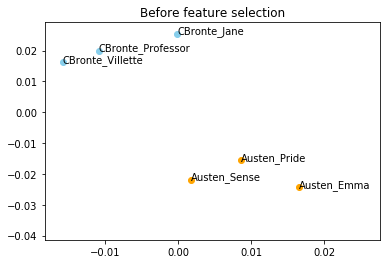

In [90]:
xs, ys = pos[:, 0], pos[:, 1]
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.savefig('plots/lot_feature_selection_mds_before.png', bbox_inches='tight')
plt.title("Before feature selection")
plt.show()

In [91]:
keyness, _ = chi2(dtm, names)
selected = np.argsort(keyness)[::-1][0:50]
dtm_chi2 = dtm[:, selected]
dist = 1 - cosine_similarity(dtm_chi2)
mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

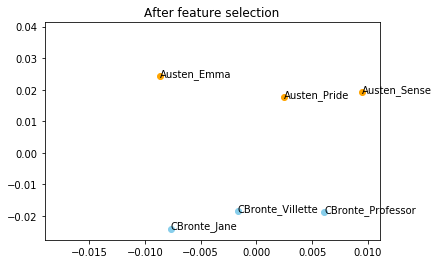

In [92]:
 xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.savefig('plots/lot_feature_selection_mds_after.png', bbox_inches='tight')
plt.title("After feature selection")
plt.show()

#### Exercises
=========

1. Using the two groups of texts (Austen and C. BrontÃ«), find the top 40
   characteristic words by the :math:`\chi^2` statistic. Feel free to use
   scikit-learn's ``chi2``.

2. The following is a random partition of the texts. Find the top 40
   characteristic words by the :math:`\chi^2` statistic. How do these
   compare with those you found in exercise 1?

In [93]:
import random
random.seed(1)
shuffled = filenames.copy()
random.shuffle(shuffled)
group_a = shuffled[:len(filenames)//2]
group_b = shuffled[len(filenames)//2:]

In [94]:
group_a
group_b

['Austen_Emma.txt', 'CBronte_Professor.txt', 'Austen_Pride.txt']

3. Reconstruct the corpus using only these 40 words. Find the cosine distances
   between pairs of texts and visualize these using multi-dimensional scaling
   (see :ref:`working-with-text` for a refresher). Compare this plot to the MDS
   plot of the distances between texts using the full vocabulary.

============================
## 4. Topic modeling with MALLET
============================

This section illustrates how to use `MALLET <http://mallet.cs.umass.edu/>`_ to
model a corpus of texts using a topic model and how to analyze the results using
Python.

A topic model is a probabilistic model of the words appearing in a corpus of
documents.  (There are a number of general introductions to topic models
available, such as :cite:`blei_introduction_2012`.) The particular topic model
used in this section is Latent Dirichlet Allocation (LDA), a model introduced in
the context of text analysis in 2003 :cite:`blei_latent_2003`. LDA is an
instance of a more general class of models called mixed-membership models. While
LDA involves a greater number of distributions and parameters than the Bayesian
model introduced in the section on :ref:`group comparison
<bayesian-group-comparison>`, both are instances of a Bayesian probabilistic
model. In fact, posterior inference for both models is typically performed in
precisely the same manner, using Gibbs sampling with conjugate priors.

This section assumes prior exposure to topic modeling and proceeds as follows:

1. MALLET is downloaded and used to fit a topic model of six novels, three by
   BrontÃ« and three by Austen. Because these are lengthy texts, the novels are split
   up into smaller sections---a preprocessing step which improves results considerably.
2. The output of MALLET is loaded into Python as a document-topic matrix (a
   2-dimensional array) of topic shares.
3. Topics, discrete distributions over the vocabulary, are analyzed.

Note that :ref:`an entire section <topic-model-visualization>` is devoted to
visualizing topic models. This section focuses on using MALLET and processing
the results.

This section uses six novels by BrontÃ« and Austen. These novels are divided into
parts as follows:

In [95]:
import numpy as np; np.set_printoptions(precision=2)

import os
CORPUS_PATH = os.path.join('data', 'austen-bronte-split')
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

In [96]:
# files are located in data/austen-brontÃ«-split
len(filenames)
filenames[:5]

['data\\austen-bronte-split\\Austen_Emma0000.txt',
 'data\\austen-bronte-split\\Austen_Emma0001.txt',
 'data\\austen-bronte-split\\Austen_Emma0002.txt',
 'data\\austen-bronte-split\\Austen_Emma0003.txt',
 'data\\austen-bronte-split\\Austen_Emma0004.txt']

### 4a. Running Mallet
=======================
#### Note
The ``nltk`` package provides a thin wrapper for MALLET which may be  worth investigating. See ``nltk.classify.mallet``.
   
Under Windows the commands are similar. For detailed instructions see the
article ["Getting Started with Topic Modeling and MALLET"](http://programminghistorian.org/lessons/topic-modeling-and-mallet).  The MALLET homepage also has [instructions on how to install and run the software
under Windows](http://mallet.cs.umass.edu/download.php).

We will run MALLET using the default parameters. Using the option
``--random-seed 1`` should guarantee that the results produced match those
appearing below.

.. code-block:: bash

    mallet-2.0.7/bin/mallet import-dir --input data/austen-brontÃ«-split/ --output /tmp/topic-input-austen-brontÃ«.mallet --keep-sequence --remove-stopwords
    mallet-2.0.7/bin/mallet train-topics --input /tmp/topic-input-austen-brontÃ«.mallet --num-topics 20 --output-doc-topics /tmp/doc-topics-austen-brontÃ«.txt --output-topic-keys /tmp/topic-keys-austen-brontÃ«.txt --random-seed 1


myNotes: Getting Started link incudes instructions on how to install Mallet (and JDK) first, before can run Mallet.

After successful install, my run from C:\mallet directory:

$dir_name bin\mallet import-dir --input C:\Users\chq-anyac\miniconda\myTAToM\data\austen-bronte-split\ --output C:\Users\chq-anyac\miniconda\myTAToM\tmp\topic-input-austen-bronte.mallet --keep-sequence --remove-stopwords

$dir_name bin\mallet train-topics --input C:\Users\chq-anyac\miniconda\myTAToM\tmp\topic-input-austen-bronte.mallet --num-topics 20 --output-doc-topics C:\Users\chq-anyac\miniconda\myTAToM\tmp\doc-topics-austen-bronte.txt --output-topic-keys C:\Users\chq-anyac\miniconda\myTAToM\tmp\topic-keys-austen-bronte.txt --random-seed 1

### 4b. Processing MALLET output
===================================

We have already seen that :ref:`a document-term matrix is a convenient way to
represent the word frequencies <working-with-text>` associated with each
document. Similarly, as each document is associated with a set of topic shares,
it will be useful to gather these features into a document-topic
matrix.

#### Note
Topic shares are also referred to as topic *weights*,
   *mixture weights*, or *component weights*. Different communities favor
   different terms.

Manipulating the output of MALLET into a document-topic matrix is not
entirely intuitive. Fortunately the tools required for the job are available in
Python and the procedure is similar to that reviewed in the previous section on
:ref:`grouping texts <grouping-texts>`.

MALLET delivers the topic shares for each document into a file specified by the
``--output-doc-topics`` option. In this case we have provided the output
filename ``/tmp/doc-topics-austen-brontÃ«.txt``. The first lines of this file
should look something like this:

#doc name topic proportion ...

   0	file:/.../austen-brontÃ«-split/Austen_Pride0103.txt	3	0.2110215053763441	14	0.13306451612903225
   
   1	file:/.../austen-brontÃ«-split/Austen_Pride0068.txt	17	0.19915254237288135	3	0.14548022598870056
     ...


The first two columns of ``doc-topics.txt`` record the document number
(0-based indexing) and the full path to the filename. The rest of the columns are best
considered as (topic-number, topic-share) pairs. There are as many of these
pairs as there are topics. All columns are separated by tabs (there's even
a trailing tab at the end of the line). With the exception of the header (the
first line), this file records data using `tab-separated values
<https://en.wikipedia.org/wiki/Tab-separated_values>`_. There are two challenges
in parsing this file into a document-topic matrix. The first is sorting.
The texts do not appear in a consistent order in ``doc-topics.txt`` and the
topic number and share pairs appear in different columns depending on the
document. We will need to reorder these pairs before assembling them into
a matrix.[#fnmapreduce]_ The second challenge is that the number of columns will
vary with the number of topics specified (``--num-topics``). Fortunately, the
documentation in the Python library `itertools
<http://docs.python.org/dev/library/itertools.html>`_ describes a function
called ``grouper`` using ``itertools.izip_longest`` that solves our problem.

In [97]:
'''$ac didnt' run this part
import os
import shutil
import subprocess

N_TOPICS = 20
MALLET_INPUT = 'source/cache/topic-input-austen-bronte-split.mallet'
MALLET_TOPICS = 'source/cache/doc-topic-austen-bronte-{}topics.txt'.format(N_TOPICS)
MALLET_KEYS = 'source/cache/doc-topic-austen-bronte-{}topics-keys.txt'.format(N_TOPICS)
if not os.path.exists(MALLET_INPUT):
    subprocess.check_call('mallet/bin/mallet import-dir --input data/austen-bronte-split/ --output {} --keep-sequence  remove-stopwords'.format(MALLET_INPUT), shell=True)
    
 # again, splitting up to help IPython parse

    shutil.copy(MALLET_INPUT,'/tmp/topic-input-austen-brontÃ«.mallet')

    if not os.path.exists(MALLET_TOPICS):
        subprocess.check_call('mallet-2.0.7/bin/mallet train-topics --input /tmp/topic-input-austen-brontÃ«.mallet --num-topics {} --output-doc-topics {} --output-topic-keys {} --random-seed 1'.format(N_TOPICS, MALLET_TOPICS, MALLET_KEYS), shell=True)
    shutil.copy(MALLET_TOPICS,'/tmp/doc-topics-austen-brontÃ«.txt')
    shutil.copy(MALLET_KEYS,'/tmp/topic-keys-austen-brontÃ«.txt')
'''

"$ac didnt' run this part\nimport os\nimport shutil\nimport subprocess\n\nN_TOPICS = 20\nMALLET_INPUT = 'source/cache/topic-input-austen-bronte-split.mallet'\nMALLET_TOPICS = 'source/cache/doc-topic-austen-bronte-{}topics.txt'.format(N_TOPICS)\nMALLET_KEYS = 'source/cache/doc-topic-austen-bronte-{}topics-keys.txt'.format(N_TOPICS)\nif not os.path.exists(MALLET_INPUT):\n    subprocess.check_call('mallet/bin/mallet import-dir --input data/austen-bronte-split/ --output {} --keep-sequence  remove-stopwords'.format(MALLET_INPUT), shell=True)\n    \n # again, splitting up to help IPython parse\n\n    shutil.copy(MALLET_INPUT,'/tmp/topic-input-austen-brontÃ«.mallet')\n\n    if not os.path.exists(MALLET_TOPICS):\n        subprocess.check_call('mallet-2.0.7/bin/mallet train-topics --input /tmp/topic-input-austen-brontÃ«.mallet --num-topics {} --output-doc-topics {} --output-topic-keys {} --random-seed 1'.format(N_TOPICS, MALLET_TOPICS, MALLET_KEYS), shell=True)\n    shutil.copy(MALLET_TOPICS,'/

In [98]:
'''$ac didnt' work with my_ generated files
   substituded with tatom files from directory cache
   specifically replaced myTAToM\tmp\doc-topics-austen-bronte
   with tatom\tatom-develop\source\cache\doc-topic-austen-brontë-20topics.txt
   saved mine just in case, starting with my_
'''

import numpy as np
import itertools
import operator
import os

def grouper(n, iterable, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

doctopic_triples = []
mallet_docnames = []

with open("tmp/doc-topics-austen-bronte.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        # ``docnum, docname, *values`` performs "tuple unpacking", useful Python feature
        # ``.rstrip()`` removes the superfluous trailing tab
        docnum, docname, *values = line.rstrip().split('\t')
        mallet_docnames.append(docname)
        for topic, share in grouper(2, values):
            triple = (docname, int(topic), float(share))
            doctopic_triples.append(triple)

# sort the triples
# triple is (docname, topicnum, share) so sort(key=operator.itemgetter(0,1))
# sorts on (docname, topicnum) which is what we want
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

# sort the document names rather than relying on MALLET's ordering
mallet_docnames = sorted(mallet_docnames)

# collect into a document-term matrix
num_docs = len(mallet_docnames)
num_topics = len(doctopic_triples) // len(mallet_docnames)

# the following works because we know that the triples are in sequential order
doctopic = np.zeros((num_docs, num_topics))
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share


In [99]:
doctopic_orig = doctopic.copy()

print( len(doctopic_triples) % num_docs == 0)
print( np.all(doctopic > 0))
print( len(doctopic) == len(filenames))
print (np.allclose(np.sum(doctopic, axis=1), 1))

True
True
True
True


In [100]:
# The following method is considerably faster. It uses the itertools library which is part of the Python standard library.
import itertools
import operator
doctopic = np.zeros((num_docs, num_topics))
for i, (doc_name, triples) in enumerate(itertools.groupby(doctopic_triples, key=operator.itemgetter(0))):
    doctopic[i, :] = np.array([share for _, _, share in triples])
    
print(np.all(doctopic > 0))
print(np.allclose(np.sum(doctopic, axis=1), 1))
print( len(doctopic) == len(filenames))
print( np.all(doctopic_orig == doctopic))

True
True
True
True


Now we will calculate the average of the topic shares associated with each
novel. Recall that we have been working with small sections of novels. The
following step combines the topic shares for sections associated with the same
novel.

In [101]:
 novel_names = []
for fn in filenames:
    basename = os.path.basename(fn)
    # splitext splits the extension off, 'novel.txt' -> ('novel', '.txt')
    name, ext = os.path.splitext(basename)
    # remove trailing numbers identifying chunk
    name = name.rstrip('0123456789')
    novel_names.append(name)
# turn this into an array so we can use NumPy functions
novel_names = np.asarray(novel_names)

print(len(set(novel_names)) == 6)

doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(novel_names))
doctopic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

doctopic = doctopic_grouped

#docnames = sorted(set(novel_names))

True


In [102]:
import pandas as pd
OUTPUT_HTML_PATH = os.path.join('source', 'generated')
rownames = sorted(set(novel_names))
colnames = ["Topic " + str(i) for i in range(doctopic.shape[1])][0:15]
html = pd.DataFrame(np.round(doctopic[:,0:15], 2), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'topic_model_doctopic.txt'), 'w') as f:
    f.write(html)

In [103]:
#display inline
df= pd.DataFrame(np.round(doctopic[:,0:15], 2), index=rownames, columns=colnames)
df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
Austen_Emma,0.02,0.01,0.06,0.02,0.07,0.05,0.04,0.01,0.02,0.02,0.02,0.26,0.08,0.10,0.02
Austen_Pride,0.03,0.01,0.06,0.02,0.07,0.05,0.04,0.01,0.02,0.02,0.02,0.02,0.09,0.11,0.24
Austen_Sense,0.23,0.01,0.07,0.02,0.08,0.05,0.04,0.01,0.02,0.02,0.02,0.02,0.07,0.11,0.02
CBronte_Jane,0.02,0.02,0.05,0.09,0.05,0.05,0.05,0.05,0.11,0.08,0.09,0.02,0.03,0.03,0.02
CBronte_Professor,0.01,0.06,0.05,0.06,0.05,0.06,0.06,0.06,0.04,0.07,0.04,0.01,0.04,0.03,0.01
CBronte_Villette,0.01,0.09,0.04,0.06,0.04,0.06,0.05,0.10,0.03,0.07,0.04,0.01,0.04,0.03,0.01


In order to fit into the space available, the table above displays the first 15
of 20 topics.

### 4c. Inspecting the topic model
==========================

The first thing we should appreciate about our topic model is that the twenty
shares do a remarkably good job of summarizing our corpus. For example, they
preserve the distances between novels (see figures below). By this measure, LDA
is good at dimensionality reduction: we have taken a matrix of dimensions 813 by
14862 (occupying almost three megabytes of memory if stored in a spare matrix)
and fashioned a representation that preserves important features in a matrix
that is 813 by 20 (5% the size of the original).

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

CORPUS_PATH_UNSPLIT = os.path.join('data', 'austen-bronte-split')
filenames = [os.path.join(CORPUS_PATH_UNSPLIT, fn) for fn in sorted(os.listdir(CORPUS_PATH_UNSPLIT))]
vectorizer = CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix
dtm.shape
dtm.data.nbytes  # number of bytes dtm takes up
dtm.toarray().data.nbytes  # number of bytes dtm as array takes up

doctopic_orig.shape
doctopic_orig.data.nbytes  # number of bytes document-topic shares take up

130080

In [105]:
# COSINE SIMILARITY
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

True


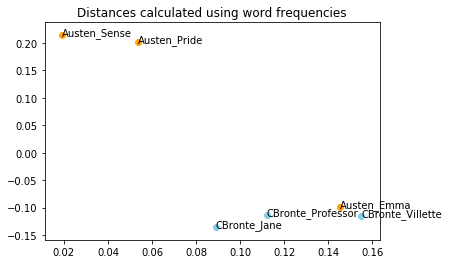

In [106]:
print(dtm.shape[0] == doctopic_orig.shape[0])

# NOTE: the IPython directive seems less prone to errors when these blocks
# are split up.
xs, ys = pos[:, 0], pos[:, 1]
names = sorted(set(novel_names))
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.title("Distances calculated using word frequencies")
plt.savefig('plots/plot_topic_model_cosine_mds.png', bbox_inches='tight')
plt.show()


In [107]:
 # TOPIC-MODEL
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(doctopic)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)


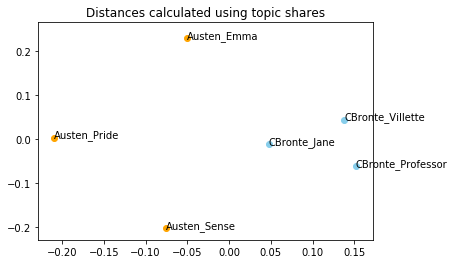

In [108]:
# NOTE: the IPython directive seems less prone to errors when these blocks are split up.
xs, ys = pos[:, 0], pos[:, 1]
names = sorted(set(novel_names))
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.title("Distances calculated using topic shares")
plt.savefig('plots/plot_topic_model_doctopic_euclidean_mds.png', bbox_inches='tight')
plt.show()


Even though a topic model "discards" the "fine-grained" information recorded in
the matrix of word frequencies, it preserves salient details of the underlying
matrix. That is, the topic shares associated with a document have an
interpretation in terms of word frequencies. This is best illustrated by
examining the present topic model.

First let us identify the most significant topics for each text in the corpus.
This procedure does not differ in essence from the procedure for identifying the
most frequent words in each text.

In [109]:
novels = sorted(set(novel_names))
print("Top topics in...")
for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(novels[i], top_topics_str))

Top topics in...
Austen_Emma: 11 13 12
Austen_Pride: 14 13 12
Austen_Sense: 0 13 4
CBronte_Jane: 8 3 10
CBronte_Professor: 17 9 5
CBronte_Villette: 7 19 1


#### Note

Recall that, like everything else in Python (and C, Java, and many
    other languages), the topics use 0-based indexing; the first topic is topic 0.

Each topic in the topic model can be inspected. Each topic is a distribution
which captures in probabilistic terms, the words associated with the topic and
the strength of the association (the posterior probability of finding a word
associated with a topic). Sometimes this distribution is called a topic-word
distribution (in contrast to the document-topic distribution). Again, this is
best illustrated by inspecting the topic-word distributions provided by MALLET
for our Austen-BrontÃ« corpus.  MALLET places (a subset of) the topic-word
distribution for each topic in a file specified by the command-line option
``--output-topic-keys``. For the run of ``mallet`` used in this section, this
file is ``/tmp/topic-keys-austen-brontÃ«.txt``. The first line of this file
should resemble the following:

0	2.5	long room looked day eyes make voice head till girl morning feel called table turn continued times appeared breakfast

We need to parse this file into something we can work with. Fortunately this
task is not difficult.

In [110]:
with open('tmp/topic-keys-austen-bronte.txt') as input:
    topic_keys_lines = input.readlines()
topic_words = []
for line in topic_keys_lines:
    _, _, words = line.split('\t')  # tab-separated
    words = words.rstrip().split(' ')  # remove the trailing '\n'
    topic_words.append(words)

# now we can get a list of the top words for topic 0 with topic_words[0]
topic_words[0]

['elinor',
 'mrs',
 'marianne',
 'sister',
 'mother',
 'edward',
 'dashwood',
 'colonel',
 'jennings',
 'willoughby',
 'john',
 'thing',
 'lucy',
 'great',
 'miss',
 'brandon',
 'day',
 'dear',
 'happy']

Now we have everything we need to list the words associated with each topic.

In [111]:
N_WORDS_DISPLAY = 10
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:N_WORDS_DISPLAY])))

Topic 0: elinor mrs marianne sister mother edward dashwood colonel jennings willoughby
Topic 1: madame monsieur paul de mademoiselle vous est emanuel la hand
Topic 2: man good make years life woman wife suppose father young
Topic 3: jane god st john heart mine felt put hand strange
Topic 4: time morning long left found return felt days wished leave
Topic 5: made moment looked eyes silence voice smile sat man gave
Topic 6: house looked good thought place found small fine large asked
Topic 7: madame beck dress pale knew light stood dark blue full
Topic 8: mr sir rochester don hall back heard night master ll
Topic 9: door long round house garden air black high rose great
Topic 10: room miss mrs chair table eyes long head hands hair
Topic 11: mr emma mrs miss harriet thing weston knightley elton jane
Topic 12: young lady evening general people pleasure party pretty attention ladies
Topic 13: feelings happiness opinion friend regard situation spirits affection ill give
Topic 14: mr elizabet

There are many ways to inspect and to visualize topic models. Some of the more
common methods are covered in :ref:`next section <topic-model-visualization>`.

#### Distinctive topics
------------------

Finding distinctive topics is analogous to the task of :ref:`finding distinctive
words <feature-selection>`. The topic model does an excellent job of focusing
attention on recurrent patterns (of co-occurrence) in the word frequencies
appearing in a corpus. To the extent that we are interested in these kinds of
patterns (rather than the rare or isolated feature of texts), working with
topics tends to be easier than working with word frequencies.

Consider the task of finding the distinctive topics in Austen's novels. Here the
simple difference-in-averages provides an easy way of finding topics that tend
to be associated more strongly with Austen's novels than with BrontÃ«'s.


In [112]:
austen_indices, cbronte_indices = [], []
for index, fn in enumerate(sorted(set(novel_names))):
    if "Austen" in fn:
        austen_indices.append(index)
    elif "CBronte" in fn:
        cbronte_indices.append(index)

austen_avg = np.mean(doctopic[austen_indices, :], axis=0)
cbronte_avg = np.mean(doctopic[cbronte_indices, :], axis=0)
keyness = np.abs(austen_avg - cbronte_avg)
ranking = np.argsort(keyness)[::-1]  # from highest to lowest; [::-1] reverses order in Python sequences

# distinctive topics:
ranking[:10]

array([11, 14,  0, 13, 17,  7,  9,  3,  1, 12], dtype=int64)

In [113]:
N_WORDS_DISPLAY = 10
N_TOPICS_DISPLAY = 10
topics_display = sorted(ranking[0:N_TOPICS_DISPLAY])
arr = doctopic[:, topics_display]
colnames = ["Topic {}".format(t) for t in topics_display]
rownames = sorted(set(novel_names))
html = pd.DataFrame(np.round(arr,2), index=rownames, columns=colnames).to_html()
arr = np.row_stack([topic_words[t][:N_WORDS_DISPLAY] for t in topics_display])
rownames = ["Topic {}".format(t) for t in topics_display]
colnames = ['']*N_WORDS_DISPLAY
html += pd.DataFrame(arr, index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'topic_model_distinctive_avg_diff.txt'), 'w') as f:
    f.write(html)


In [114]:
#$acnote to display together redoing the block above in sequence of 2 steps
N_WORDS_DISPLAY = 10
N_TOPICS_DISPLAY = 10
topics_display = sorted(ranking[0:N_TOPICS_DISPLAY])
arr = doctopic[:, topics_display]
colnames = ["Topic {}".format(t) for t in topics_display]
rownames = sorted(set(novel_names))
#html = pd.DataFrame(np.round(arr,2), index=rownames, columns=colnames).to_html()

#display inline
df = pd.DataFrame(np.round(arr,2), index=rownames, columns=colnames)
df


,Topic 0,Topic 1,Topic 3,Topic 7,Topic 9,Topic 11,Topic 12,Topic 13,Topic 14,Topic 17
Austen_Emma,0.02,0.01,0.02,0.01,0.02,0.26,0.08,0.10,0.02,0.02
Austen_Pride,0.03,0.01,0.02,0.01,0.02,0.02,0.09,0.11,0.24,0.01
Austen_Sense,0.23,0.01,0.02,0.01,0.02,0.02,0.07,0.11,0.02,0.01
CBronte_Jane,0.02,0.02,0.09,0.05,0.08,0.02,0.03,0.03,0.02,0.04
CBronte_Professor,0.01,0.06,0.06,0.06,0.07,0.01,0.04,0.03,0.01,0.16
CBronte_Villette,0.01,0.09,0.06,0.10,0.07,0.01,0.04,0.03,0.01,0.04


In [115]:
#part2
arr = np.row_stack([topic_words[t][:N_WORDS_DISPLAY] for t in topics_display])
rownames = ["Topic {}".format(t) for t in topics_display]
colnames = ['']*N_WORDS_DISPLAY
#html += pd.DataFrame(arr, index=rownames, columns=colnames).to_html()

#display inline
df2 = pd.DataFrame(arr, index=rownames, columns=colnames)
df2

,,,,,,,,,,
Topic 0,elinor,mrs,marianne,sister,mother,edward,dashwood,colonel,jennings,willoughby
Topic 1,madame,monsieur,paul,de,mademoiselle,vous,est,emanuel,la,hand
Topic 3,jane,god,st,john,heart,mine,felt,put,hand,strange
Topic 7,madame,beck,dress,pale,knew,light,stood,dark,blue,full
Topic 9,door,long,round,house,garden,air,black,high,rose,great
Topic 11,mr,emma,mrs,miss,harriet,thing,weston,knightley,elton,jane
Topic 12,young,lady,evening,general,people,pleasure,party,pretty,attention,ladies
Topic 13,feelings,happiness,opinion,friend,regard,situation,spirits,affection,ill,give
Topic 14,mr,elizabeth,darcy,jane,bennet,mrs,bingley,miss,sister,wickham
Topic 17,school,english,french,hunsden,frances,mdlle,pelet,crimsworth,read,time


Footnote: Those familiar with `MapReduce <https://en.wikipedia.org/wiki/MapReduce>`_ may recognize the pattern of splitting a dataset into smaller pieces and then (re)ordering them.

============================
## 5. Topic modeling in Python
============================

This section illustrates how to do approximate topic modeling in Python. We will
use a technique called `non-negative matrix factorization (NMF)
<https://en.wikipedia.org/wiki/Non-negative_matrix_factorization>`_ that
strongly resembles Latent Dirichlet Allocation (LDA) which we covered in the
previous section, :ref:`topic-model-mallet`. [#fn_nmf]_ Whereas LDA is
a probabilistic model capable of expressing uncertainty about the placement of
topics across texts and the assignment of words to topics, NMF is
a deterministic algorithm which arrives at a single representation of the
corpus. For this reason, NMF is often characterized as a machine learning
algorithm. Like LDA, NMF arrives at its representation of a corpus in terms of
something resembling "latent topics".

#### Note:: The name "Non-negative matrix factorization" has the virtue of being
   transparent. A "non-negative matrix" is a matrix containing non-negative
   values (here zero or positive word frequencies). And
   factorization refers to the familiar kind of mathematical factorization.
   Just as a polynomial :math:`x^2 + 3x + 2` may be factored into a simple
   product :math:`(x+2)(x+1)`, so too may a matrix
   :math:`\bigl(\begin{smallmatrix} 6&2&4\\ 9&3&6 \end{smallmatrix} \bigr)` be
   factored into the product of two smaller matrices
   :math:`\bigl(\begin{smallmatrix} 2\\ 3 \end{smallmatrix} \bigr)
   \bigl(\begin{smallmatrix} 3&2&1 \end{smallmatrix} \bigr)`.

This section follows the procedures described in :ref:`topic-model-mallet`,
making the substitution of NMF for LDA where appropriate.

This section uses the novels by BrontÃ« and Austen. These novels are divided into
parts as follows:


In [116]:
#same as in previous Mallet part
import os
CORPUS_PATH = os.path.join('data', 'austen-bronte-split')
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])
len(filenames)    
filenames[:5]

['data\\austen-bronte-split\\Austen_Emma0000.txt',
 'data\\austen-bronte-split\\Austen_Emma0001.txt',
 'data\\austen-bronte-split\\Austen_Emma0002.txt',
 'data\\austen-bronte-split\\Austen_Emma0003.txt',
 'data\\austen-bronte-split\\Austen_Emma0004.txt']

### 5a. Using Non-negative matrix factorization
=======================================

As always we need to give Python access to our corpus. In this case we will work
with our familiar document-term matrix.

In [117]:
import numpy as np  # a conventional alias
import sklearn.feature_extraction.text as text

vectorizer = text.CountVectorizer(input='filename', stop_words='english', min_df=20)
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())

dtm.shape
len(vocab)

2902

By analogy with LDA, we will use NMF to get a document-topic matrix (topics here
will also be referred to as "components") and a list of top words for each
topic. We will make analogy clear by using the same variable names:
``doctopic`` and ``topic_words``

In [118]:
from sklearn import decomposition

num_topics = 20
num_top_words = 20

clf = decomposition.NMF(n_components=num_topics, random_state=1)

# this next step may take some time

In [119]:
"""
import os
import pickle

NMF_TOPICS = 'source/cache/nmf-austen-brontÃ«-doc-topic.pkl'
NMF_CLF = 'source/cache/nmf-austen-brontÃ«-clf.pkl'

# the ipython directive seems to have trouble with multi-line indented blocks
if not os.path.exists(NMF_CLF):
    doctopic = clf.fit_transform(dtm)
    pickle.dump(doctopic, open(NMF_TOPICS, 'wb'))
    pickle.dump(clf, open(NMF_CLF, 'wb'))


clf = pickle.load(open(NMF_CLF, 'rb'))
doctopic = pickle.load(open(NMF_TOPICS, 'rb'))
"""

"\nimport os\nimport pickle\n\nNMF_TOPICS = 'source/cache/nmf-austen-brontÃ«-doc-topic.pkl'\nNMF_CLF = 'source/cache/nmf-austen-brontÃ«-clf.pkl'\n\n# the ipython directive seems to have trouble with multi-line indented blocks\nif not os.path.exists(NMF_CLF):\n    doctopic = clf.fit_transform(dtm)\n    pickle.dump(doctopic, open(NMF_TOPICS, 'wb'))\n    pickle.dump(clf, open(NMF_CLF, 'wb'))\n\n\nclf = pickle.load(open(NMF_CLF, 'rb'))\ndoctopic = pickle.load(open(NMF_TOPICS, 'rb'))\n"

In [120]:
doctopic = clf.fit_transform(dtm)

In [121]:
# print words associated with topics
topic_words = []
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

To make the analysis and visualization of NMF components similar to that of
LDA's topic proportions, we will scale the document-component matrix such that
the component values associated with each document sum to one.


In [122]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

Now we will average those topic shares associated with the same novel together
--- just as we did with the topic shares from MALLET.

In [123]:
novel_names = []
for fn in filenames:
    basename = os.path.basename(fn)
    # splitext splits the extension off, 'novel.txt' -> ('novel', '.txt')
    name, ext = os.path.splitext(basename)
    # remove trailing numbers identifying chunk
    name = name.rstrip('0123456789')
    novel_names.append(name)
# turn this into an array so we can use NumPy functions
novel_names = np.asarray(novel_names)

#print(len(set(novel_names)) == 6)
#doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(novel_names))
doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

doctopic = doctopic_grouped
#docnames = sorted(set(novel_names))

In [124]:
import pandas as pd
OUTPUT_HTML_PATH = os.path.join('source', 'generated')
rownames = sorted(set(novel_names))
colnames = ["NMF Topic " + str(i + 1) for i in range(doctopic.shape[1])][0:15]
html = pd.DataFrame(np.round(doctopic[:,0:15], 2), index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'NMF_doctopic.txt'), 'w') as f:
    f.write(html)

In [125]:
#display inline
df = pd.DataFrame(np.round(doctopic[:,0:15], 2), index=rownames, columns=colnames)
df

,NMF Topic 1,NMF Topic 2,NMF Topic 3,NMF Topic 4,NMF Topic 5,NMF Topic 6,NMF Topic 7,NMF Topic 8,NMF Topic 9,NMF Topic 10,NMF Topic 11,NMF Topic 12,NMF Topic 13,NMF Topic 14,NMF Topic 15
Austen_Emma,0.06,0.12,0.00,0.00,0.10,0.02,0.01,0.06,0.09,0.05,0.01,0.01,0.01,0.13,0.05
Austen_Pride,0.04,0.09,0.01,0.25,0.05,0.02,0.01,0.06,0.04,0.04,0.01,0.13,0.01,0.00,0.06
Austen_Sense,0.04,0.03,0.24,0.01,0.10,0.02,0.03,0.00,0.04,0.08,0.01,0.02,0.01,0.00,0.05
CBronte_Jane,0.04,0.08,0.00,0.00,0.04,0.21,0.10,0.07,0.06,0.07,0.02,0.01,0.04,0.00,0.07
CBronte_Professor,0.06,0.04,0.00,0.00,0.01,0.19,0.01,0.01,0.00,0.05,0.02,0.01,0.30,0.00,0.08
CBronte_Villette,0.06,0.01,0.00,0.00,0.03,0.14,0.01,0.00,0.03,0.05,0.14,0.01,0.09,0.00,0.12


In order to fit into the space available, the table above displays the first 15
of 20 topics.


### 5b. Inspecting the NMF fit
======================

The topics (or components) of the NMF fit preserve the distances between novels (see the figures below).

In [126]:
# COSINE SIMILARITY
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

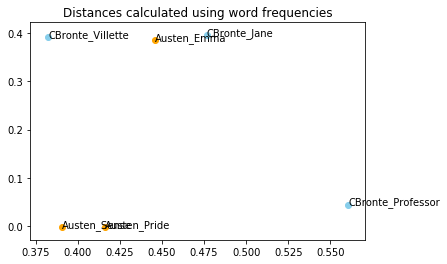

In [127]:
assert dtm.shape[0] == doctopic_orig.shape[0]
# NOTE: the IPython directive seems less prone to errors when these blocks
# are split up.
xs, ys = pos[:, 0], pos[:, 1]
names = sorted(set(novel_names))
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.title("Distances calculated using word frequencies")
plt.savefig('plots/plot_nmf_section_austen_bronte_cosine_mds.png', bbox_inches='tight')
plt.show()


In [128]:
# NMF
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(doctopic)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

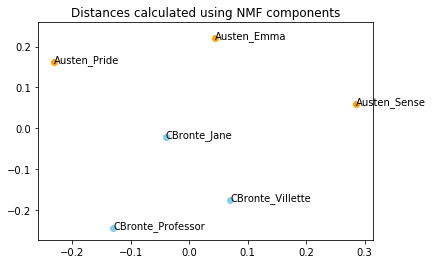

In [129]:
# NOTE: the IPython directive seems less prone to errors when these blocks are split up
xs, ys = pos[:, 0], pos[:, 1]
names = sorted(set(novel_names))
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.title("Distances calculated using NMF components")
plt.savefig('plots/plot_NMF_euclidean_mds.png', bbox_inches='tight')
plt.show()

Even though the NMF fit "discards" the fine-grained detail recorded in the
matrix of word frequencies, the matrix factorization performed allows us to
reconstruct the salient details of the underlying matrix.

As we did in the previous section, let us identify the most significant topics
for each text in the corpus.  This procedure does not differ in essence from the
procedure for identifying the most frequent words in each text.

In [130]:
novels = sorted(set(novel_names))
print("Top NMF topics in...")
for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(novels[i], top_topics_str))

Top NMF topics in...
Austen_Emma: 18 13 1
Austen_Pride: 3 11 19
Austen_Sense: 2 17 4
CBronte_Jane: 5 16 6
CBronte_Professor: 12 5 16
CBronte_Villette: 15 5 10


And we already have lists of words (``topic_words``) most strongly associated
with the components. For reference, we will display them again:


In [131]:
# show the top 15 words
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))


Topic 0: know think like man good say does said oh quite sure yes thing believe way
Topic 1: mr knightley rochester elton man did think evening business away wickham gentleman time dear wife
Topic 2: marianne elinor willoughby sister jennings mother colonel dashwood mrs brandon time moment heart little barton
Topic 3: elizabeth darcy bingley mr sister bennet wickham miss soon lydia friend room gardiner netherfield little
Topic 4: mrs did quite elton room come good thing said weston jennings came day party palmer
Topic 5: like room door night long saw thought looked house time eyes day face rochester light
Topic 6: sir rochester yes shall adele don little good john said ll mr say eyre room
Topic 7: jane fairfax love little think oh heard heart mother soon make feel voice campbell bates
Topic 8: miss woodhouse bates quite sure young fairfax oh lady say room smith temple bessie great
Topic 9: john man good father house mother years young dashwood life old family wife home woman
Topic 10: 

There are many ways to inspect and to visualize topic models. Some of the most
common methods are covered in :ref:`topic-model-visualization`.

#### Distinctive topics
------------------

Consider the task of finding the topics that are distinctive of Austen using the
NMF "topics". Using the simple difference-in-averages we can find topics that to
be associated with Austen's novels rather than BrontÃ«'s.

In [132]:
austen_indices, cbronte_indices = [], []
for index, fn in enumerate(sorted(set(novel_names))):
    if "Austen" in fn:
        austen_indices.append(index)
    elif "CBronte" in fn:
        cbronte_indices.append(index)

austen_avg = np.mean(doctopic[austen_indices, :], axis=0)
cbronte_avg = np.mean(doctopic[cbronte_indices, :], axis=0)
keyness = np.abs(austen_avg - cbronte_avg)
ranking = np.argsort(keyness)[::-1]  # from highest to lowest; [::-1] reverses order in Python sequences

# distinctive topics:
ranking[:10]

array([ 5, 12,  3,  2, 15,  4, 17, 10, 18, 13], dtype=int64)

In [133]:
N_WORDS_DISPLAY = 10
N_TOPICS_DISPLAY = 10
topics_display = sorted(ranking[0:N_TOPICS_DISPLAY])
arr = doctopic[:, topics_display]
colnames = ["Topic {}".format(t) for t in topics_display]
rownames = sorted(set(novel_names))
html = pd.DataFrame(np.round(arr,2), index=rownames, columns=colnames).to_html()
arr = np.row_stack([topic_words[t][:N_WORDS_DISPLAY] for t in topics_display])
rownames = ["Topic {}".format(t) for t in topics_display]
colnames = ['']*N_WORDS_DISPLAY
html += pd.DataFrame(arr, index=rownames, columns=colnames).to_html()
with open(os.path.join(OUTPUT_HTML_PATH, 'topic_model_distinctive_avg_diff.txt'), 'w') as f:
    f.write(html)


In [134]:
#display inline
N_WORDS_DISPLAY = 10
N_TOPICS_DISPLAY = 10
topics_display = sorted(ranking[0:N_TOPICS_DISPLAY])
arr = doctopic[:, topics_display]
colnames = ["Topic {}".format(t) for t in topics_display]
rownames = sorted(set(novel_names))
df = pd.DataFrame(np.round(arr,2), index=rownames, columns=colnames)
df


,Topic 2,Topic 3,Topic 4,Topic 5,Topic 10,Topic 12,Topic 13,Topic 15,Topic 17,Topic 18
Austen_Emma,0.00,0.00,0.10,0.02,0.01,0.01,0.13,0.00,0.01,0.16
Austen_Pride,0.01,0.25,0.05,0.02,0.01,0.01,0.00,0.00,0.01,0.00
Austen_Sense,0.24,0.01,0.10,0.02,0.01,0.01,0.00,0.00,0.18,0.00
CBronte_Jane,0.00,0.00,0.04,0.21,0.02,0.04,0.00,0.01,0.00,0.00
CBronte_Professor,0.00,0.00,0.01,0.19,0.02,0.30,0.00,0.04,0.01,0.00
CBronte_Villette,0.00,0.00,0.03,0.14,0.14,0.09,0.00,0.14,0.02,0.00


In [135]:
#display inline part2
arr = np.row_stack([topic_words[t][:N_WORDS_DISPLAY] for t in topics_display])
rownames = ["Topic {}".format(t) for t in topics_display]
colnames = ['']*N_WORDS_DISPLAY
df2 = pd.DataFrame(arr, index=rownames, columns=colnames)
df2

,,,,,,,,,,
Topic 2,marianne,elinor,willoughby,sister,jennings,mother,colonel,dashwood,mrs,brandon
Topic 3,elizabeth,darcy,bingley,mr,sister,bennet,wickham,miss,soon,lydia
Topic 4,mrs,did,quite,elton,room,come,good,thing,said,weston
Topic 5,like,room,door,night,long,saw,thought,looked,house,time
Topic 10,little,graham,bretton,papa,dr,lucy,like,polly,home,child
Topic 12,monsieur,little,english,mdlle,frances,mademoiselle,vous,est,said,pelet
Topic 13,harriet,emma,elton,mr,friend,woodhouse,knightley,martin,think,good
Topic 15,madame,beck,dr,knew,little,door,day,paul,old,night
Topic 17,edward,elinor,lucy,ferrars,dashwood,sister,think,mother,say,time
Topic 18,emma,weston,mr,knightley,frank,churchill,thing,little,father,woodhouse


Footnotes: While there are significant differences between NMF and LDA, there
   are also similarities. Indeed, if the texts in a corpus have certain
   properties, NMF and LDA will arrive at the same representation of a corpus
   :cite:`arora_practical_2013`.

==========================
## 6. Visualizing topic models
==========================

see 6_TopicModelVis.ipynb

In [136]:
docnames

NameError: name 'docnames' is not defined